# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
data = pd.io.stata.read_stata('/Users/jodelcornelio/Desktop/us_job_market_discrimination.dta')

In [100]:
# number of callbacks for white-sounding names
wi = sum(data[data.race=='w'].call)
# number of callbacks for black-sounding names
bl = sum(data[data.race=='b'].call)

In [109]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [108]:
w = data[data.race=='w']
b = data[data.race=='b']

# Null Hypothesis is that race does not matter in getting a call back, the alternate hypothesis is race playes a role in getting a call back

4870


In [112]:
# Your solution to Q3 here

def bootstrap_replicate_1d(data, func1, func2):
    D = (sum(np.random.choice(data, size=len(data))))/len(data)
    return func1(D),func2(D)

def draw_bs_reps(data, func1, func2, size=1):
    bs_replicates_1 = np.empty(size)
    bs_replicates_2 = np.empty(size)
    for i in range(size):
        bs_replicates_1[i],bs_replicates_2[i]= bootstrap_replicate_1d(data, func1,func2)
    return bs_replicates_1,bs_replicates_2

bs_replicates_mean_w,bs_replicates_std_w= draw_bs_reps(w['call'], np.mean, np.std, size=10000)
bs_replicates_mean_b,bs_replicates_std_b= draw_bs_reps(b['call'], np.mean, np.std, size=10000)
BootStrap_Mean_w = np.mean(bs_replicates_mean_w)
BootStrap_Mean_b = np.mean(bs_replicates_mean_b)




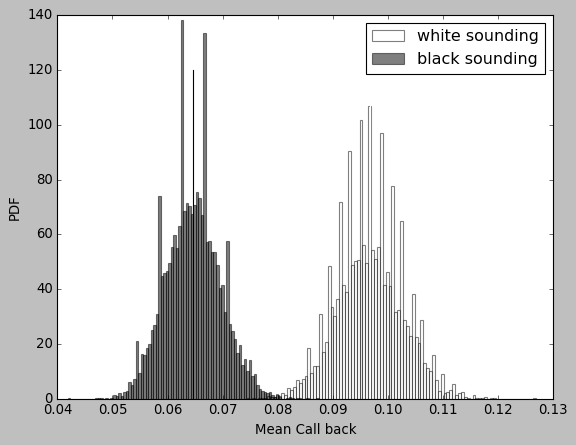

0.0


In [141]:
n_data =len(bs_replicates_mean_w)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(bs_replicates_mean_w, bins=n_bins, normed=True, color = 'white', alpha = 0.5)
n_data =len(bs_replicates_mean_b)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(bs_replicates_mean_b, bins=n_bins, normed=True, color = 'black', alpha = 0.5)
plt.xlabel('Mean Call back')
plt.ylabel('PDF')
plt.legend(['white sounding','black sounding'])
plt.plot(np.array([BootStrap_Mean_w ,BootStrap_Mean_w ]),np.array([0,120]),color = 'white')
plt.plot(np.array([BootStrap_Mean_b ,BootStrap_Mean_b ]),np.array([0,120]),color = 'black')
plt.show()


In [144]:
T_score = (np.mean(w['call'])- np.mean(b['call']))/(np.sqrt(((np.var(w['call']))/len(w['call']))+((np.var(b['call']))/len(b['call']))))
p = stats.norm.sf(abs(T_score))*2
print("p value from 2 sample T score test: ",p)

p value from 2 sample T score test:  3.86201107998e-05


In [138]:
s_error = (np.sqrt(((np.var(w['call']))/len(w['call']))+((np.var(b['call']))/len(b['call']))))*1.96
print("Margin of error: ", s_error)


LCF = (np.mean(w['call'])- np.mean(b['call'])) - s_error
HCF = (np.mean(w['call'])- np.mean(b['call'])) + s_error
print("Confidence Intervals: ",LCF,",",HCF)

M_b = np.mean(b['call'])
print("Mean call back rate for black sounding applicants: ",M_b)

Margin of error:  0.0152552840043
Confidence Intervals:  0.0167775708508 , 0.0472881388593
Mean call back rate for black sounding applicants:  0.0644763857126236


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>